In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [35]:
sir_center_X0Y0 = pd.read_csv("../empirical/subsampling_SIR_vF/data/sir/centerX0Y0pcaclosest1k.sir",header=None,sep=' ')
sir_center_X19Y4 = pd.read_csv("../empirical/subsampling_SIR_vF/data/sir/centerX19Y4pcaclosest1k.sir",header=None,sep=' ')

In [36]:
sir_center_X0Y0

,0,1,2
0,3485185,3485185,0.0
1,5375078,5375078,0.0
2,5623951,5623951,0.0
3,2234295,2234295,0.0
4,2532199,2532199,0.0
...,...,...,...
469830,5278541,5278541,0.0
469831,3799372,3799372,0.0
469832,2795508,2795508,0.0
469833,3492691,3492691,0.0


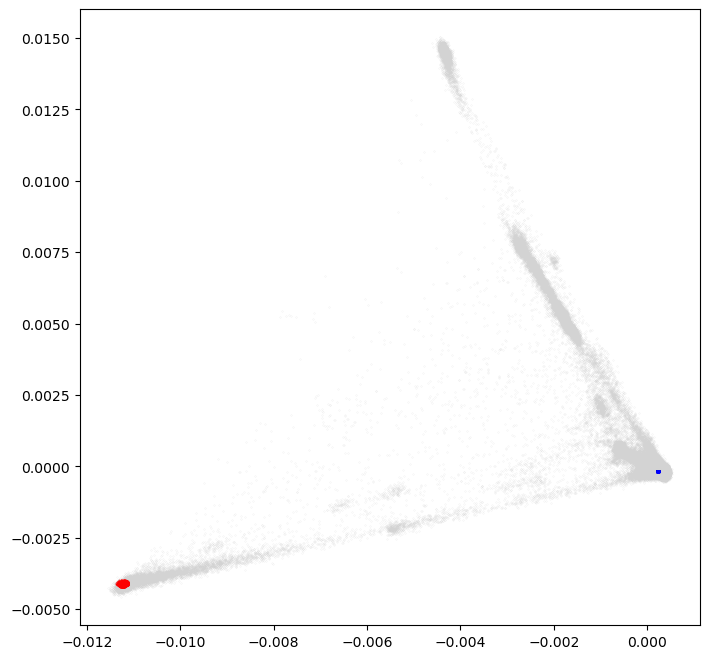

In [32]:
df = pd.read_csv('../empirical/subsampling_SIR_vF/metadata/metadata_cleaned_wes.csv')
## pca ##
df_pca = df[(df['used_in_pca'] == 1)]

x = df_pca['PC1']
y = df_pca['PC2']

fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(x,y,s=0.01,color='lightgrey')

ids = sir_center_X0Y0[sir_center_X0Y0[2]>0][0]
df_ids = df_pca[df_pca['id'].isin(ids)]
ax.scatter(df_ids['PC1'],df_ids['PC2'],s=0.05,color='red')

ids = sir_center_X19Y4[sir_center_X19Y4[2]>0][0]
df_ids = df_pca[df_pca['id'].isin(ids)]
ax.scatter(df_ids['PC1'],df_ids['PC2'],s=0.05,color='blue')

In [ ]:
# above is the target distribution - closest 1k to each center
# SIR weights are uniform 1/1000 for those within closest1k else 0, weighted by binned density

In [45]:
sir_center_X0Y0[sir_center_X0Y0[2]>0]

,0,1,2
308,1326576,1326576,0.131664
514,1932549,1932549,0.131664
1294,3504541,3504541,0.131664
1617,5551437,5551437,0.131664
2001,2158211,2158211,0.131664
...,...,...,...
466768,4824558,4824558,0.131664
467364,1209469,1209469,0.131664
468251,2072283,2072283,0.131664
468771,4913305,4913305,0.131664


In [24]:
df_ids

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,distance_to_centroid_pca,within_1epsilon_pca
202,1021677,0.0,1.0,406500.0,292500.0,Birmingham,England,-0.010847,-0.003728,0.000916,...,0.000731,-0.000157,0.002732,-0.001433,0.001206,0.001303,0.001186,0.000825,0.011727,False
226,1024321,0.0,1.0,389500.0,398500.0,Liverpool,England,-0.000579,-0.000280,0.000468,...,0.001284,0.000990,0.000338,0.000311,-0.001584,-0.000898,-0.002210,0.000931,0.000918,False
250,1026943,0.0,1.0,NaN,NaN,Croydon,Elsewhere,-0.010839,-0.003817,0.000420,...,0.000310,0.001275,0.000502,-0.000236,0.001302,-0.000584,0.001712,-0.001777,0.011746,False
298,1031326,0.0,1.0,NaN,NaN,Sheffield,Elsewhere,-0.011155,-0.004158,0.000545,...,0.001034,0.000478,-0.003579,-0.000138,-0.000756,-0.000132,-0.000759,-0.000487,0.012153,False
309,1032748,0.0,1.0,NaN,NaN,Hounslow,Elsewhere,-0.007038,-0.002332,0.000611,...,0.000885,-0.001541,0.004965,-0.001092,-0.001456,-0.001455,-0.000416,-0.000043,0.007676,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391607,6004416,0.0,1.0,526500.0,179500.0,Barts,England,-0.009044,-0.003274,0.000571,...,0.000585,-0.000693,-0.004756,0.001796,-0.000535,-0.002368,0.001232,-0.001435,0.009871,False
391643,6007563,0.0,1.0,NaN,NaN,Oxford,England,-0.000762,-0.000573,0.000054,...,-0.000321,-0.002288,-0.000805,-0.000697,0.000337,0.005735,0.000066,-0.000128,0.001160,False
391689,6010938,0.0,1.0,NaN,NaN,Birmingham,Elsewhere,-0.010866,-0.004047,0.000778,...,0.000360,-0.000728,0.003653,-0.001440,-0.000318,-0.000538,-0.000169,0.001639,0.011844,False
391755,6018153,0.0,1.0,391500.0,298500.0,Birmingham,England,-0.010831,-0.004127,0.000543,...,0.000049,0.000912,-0.002572,0.000738,0.000654,-0.000069,-0.000525,0.000324,0.011838,False
